In [11]:
%matplotlib inline
import matplotlib.pylab as plt
from rpy2.robjects import r
from rpy2.robjects import pandas2ri as pd2
pd2.activate()
import pandas as pd
import datetime as dt
r.data('UKgas')
data = pd.Series(r['UKgas'])

In [2]:
end = dt.datetime.today()
start = end - dt.timedelta(days=len(data)-1)
data.index = pd.date_range(start, end)

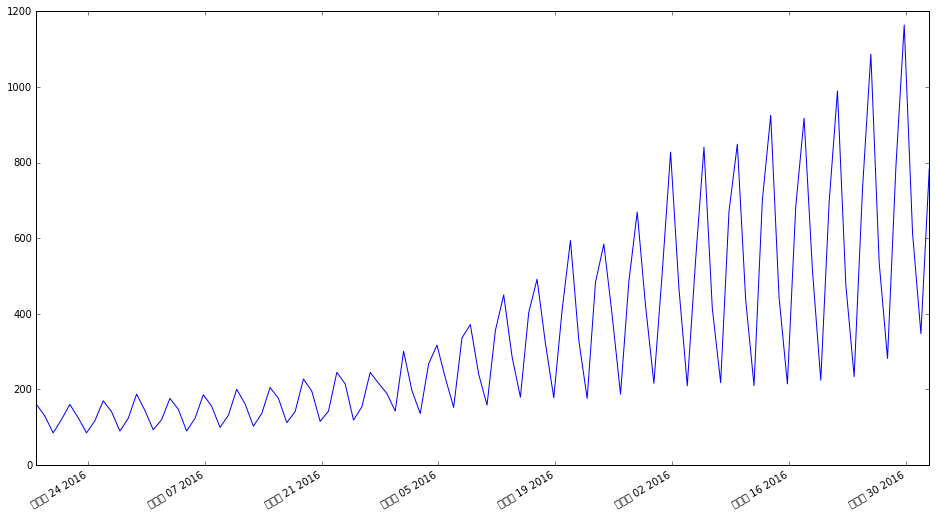

In [3]:
fig = plt.figure(figsize=(16, 9))
data.plot();

In [4]:
from forecast import forecast, stl, stldf, bind

In [5]:
bind(pd.DataFrame, stldf)
bind(pd.Series, stl, forecast)

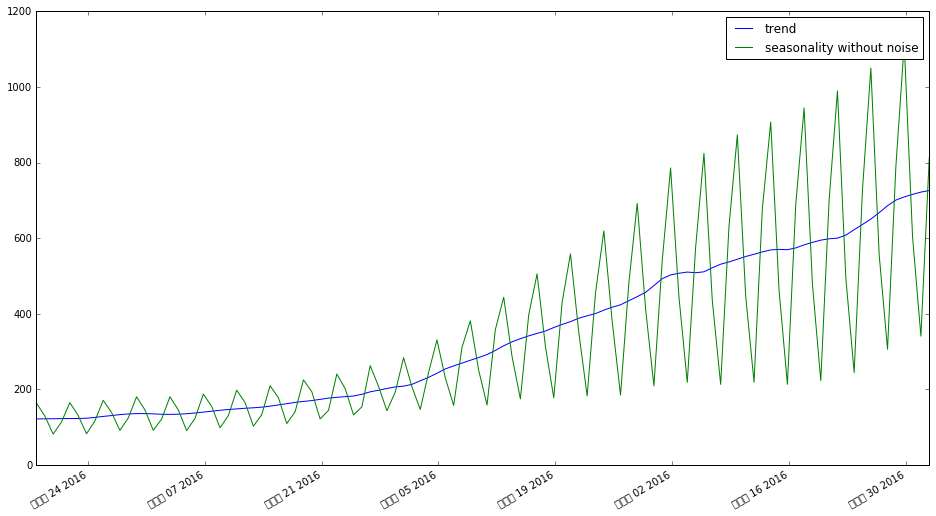

In [6]:
fig = plt.figure(figsize=(16, 9))
res = data.stl(frequency=4, method='arima')
res.ix[:,1].plot(label='trend')
(res.ix[:,0] + res.ix[:,1]).plot(label='seasonality without noise')
plt.legend();

In [7]:
N = 30

In [8]:
back = -6
future = data.iloc[:back].forecast(frequency=4, h=N, method='arima')

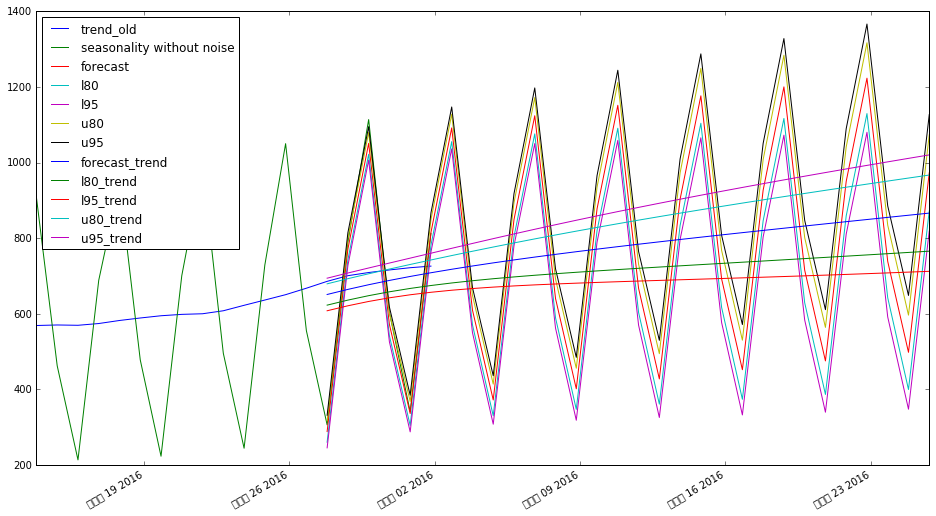

In [9]:
fig = plt.figure(figsize=(16, 9))
res = data.stl(frequency=4, method='arima')
res.ix[-20:,1].plot(label='trend_old')
(res.ix[-20:,0] + res.ix[-20:,1]).plot(label='seasonality without noise')
future.plot(ax=plt.gca())
plt.legend(loc=2);

In [10]:
list(future.columns)

['forecast',
 'l80',
 'l95',
 'u80',
 'u95',
 'forecast_trend',
 'l80_trend',
 'l95_trend',
 'u80_trend',
 'u95_trend']